<a href="https://colab.research.google.com/github/Anushka-Punukollu/Detecting-Credit-Card-Fraud/blob/main/Detecting_Credit_Card_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [15]:
df = pd.read_csv('creditcard.csv')

In [66]:
df
print('This data frame has {} columns and {} rows.'.format(df.shape[1], df.shape[0]))

This data frame has 31 columns and 284807 rows.


In [67]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [18]:
#fraud vs. normal transactions 
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))


There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

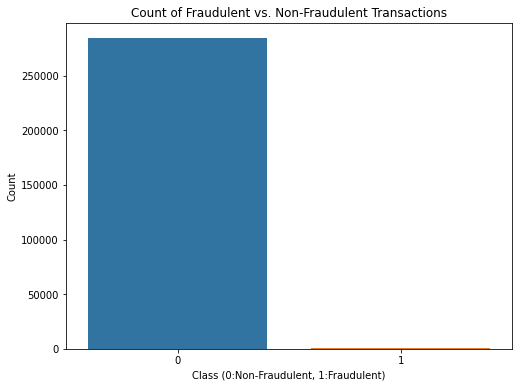

In [19]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [20]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [21]:
new_df = df.copy()
new_df['Amount'] = RobustScaler().fit_transform(new_df['Amount'].to_numpy().reshape(-1, 1))
time = new_df['Time']
new_df['Time'] = (time - time.min()) / (time.max() - time.min())
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,0.999971,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,0.999977,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,0.999977,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0


In [22]:
new_df = new_df.sample(frac=1, random_state=1)
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,0.693938,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,-0.282401,0
127467,0.453377,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,-0.279746,0
137900,0.476770,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,-0.294977,0
21513,0.183556,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,-0.084119,0
134700,0.468326,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,-0.296793,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,0.183261,-2.986845,-8.663978,-1.910863,0.664058,-3.934875,0.861269,1.647511,-0.480963,-1.546866,...,1.252092,-0.993085,-2.173147,0.145570,-0.235062,-0.227411,-0.382702,0.404045,32.002515,0
117583,0.432480,0.937083,-0.849673,0.524186,-0.020031,-0.606327,0.692302,-0.463724,0.148857,0.785062,...,-0.143322,-0.479981,-0.237902,-0.715247,0.251418,0.975406,-0.060168,0.023771,2.086495,0
73349,0.318852,-1.149963,1.696462,1.637114,2.658991,-0.021502,0.192287,0.205204,0.588754,-1.187820,...,0.025147,0.086506,-0.262748,0.321538,0.341667,0.210343,-0.162047,0.031193,-0.201495,0
267336,0.941757,1.754554,-0.699398,-0.076332,0.443915,-0.672082,0.389061,-0.807534,0.202915,0.858635,...,0.141950,0.358412,0.259748,0.746839,-0.560808,0.104636,-0.005853,-0.019622,1.017257,0


In [23]:
train, test, val = new_df[:240000], new_df[240000:262000], new_df[262000:]
train['Class'].value_counts(), test['Class'].value_counts(), val['Class'].value_counts()

(0    239589
 1       411
 Name: Class, dtype: int64, 0    21955
 1       45
 Name: Class, dtype: int64, 0    22771
 1       36
 Name: Class, dtype: int64)

In [24]:
train_np, test_np, val_np = train.to_numpy(), test.to_numpy(), val.to_numpy()
train_np.shape, test_np.shape, val_np.shape

((240000, 31), (22000, 31), (22807, 31))

In [25]:
x_train, y_train = train_np[:, :-1], train_np[:, -1]
x_test, y_test = test_np[:, :-1], test_np[:, -1]
x_val, y_val = val_np[:, :-1], val_np[:, -1]
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((240000, 30), (240000,), (22000, 30), (22000,), (22807, 30), (22807,))

In [26]:
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,0.693938,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,-0.282401,0
127467,0.453377,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,-0.279746,0
137900,0.476770,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,-0.294977,0
21513,0.183556,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,-0.084119,0
134700,0.468326,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,-0.296793,0


In [27]:
not_frauds = new_df.query('Class == 0')
frauds = new_df.query('Class == 1')
not_frauds['Class'].value_counts(), frauds['Class'].value_counts()

(0    284315
 Name: Class, dtype: int64, 1    492
 Name: Class, dtype: int64)

In [28]:
balanced_df = pd.concat([frauds, not_frauds.sample(len(frauds), random_state=1)])
balanced_df['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [29]:
balanced_df = balanced_df.sample(frac=1, random_state=1)
balanced_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
18372,0.170309,-1.762593,0.256143,1.683125,-1.279233,-1.902762,1.004210,-1.009748,-2.432546,0.458860,...,2.493579,0.320829,-0.535481,0.499401,-0.915196,-0.423434,0.107049,0.175922,2.906449,0
96341,0.380388,1.227614,-0.668974,-0.271785,-0.589440,-0.604795,-0.350285,-0.486365,-0.010809,-0.794944,...,-0.026055,-0.295255,-0.180459,-0.436539,0.494649,-0.283738,-0.001128,0.035075,1.062111,1
248296,0.890522,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,-3.747646,...,0.319261,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,-0.307413,1
264328,0.933932,-0.011624,0.640413,0.868046,-0.505279,0.261938,0.223098,0.239049,0.150877,0.225142,...,0.069401,0.268024,0.261459,0.683742,-1.567901,-0.816674,0.185781,0.283021,-0.272619,0
208904,0.794730,-0.679341,1.217389,-0.316778,-1.086725,0.855349,-0.980760,0.970589,0.133116,-0.357671,...,-0.083048,-0.137032,-0.238920,-0.617244,0.039020,-0.081848,0.234633,0.128382,-0.307273,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81557,0.341393,-4.502731,-3.876484,1.341248,0.113400,0.189428,-0.560985,-0.140478,0.684651,0.475363,...,-0.140218,0.049411,2.313731,0.252330,0.307219,0.859051,0.184033,-0.308269,4.227625,0
276071,0.965803,2.091900,-0.757459,-1.192258,-0.755458,-0.620324,-0.322077,-1.082511,0.117200,-0.140927,...,0.288253,0.831939,0.142007,0.592615,-0.196143,-0.136676,0.020182,-0.015470,-0.028645,1
175971,0.709373,1.972989,0.157281,-1.715078,1.207451,0.681612,-0.615282,0.601791,-0.291935,-0.132265,...,0.098640,0.467533,-0.078973,-0.371882,0.486038,-0.490665,-0.018374,-0.070911,0.075735,0
27738,0.200727,-2.439237,2.591458,-2.840126,1.286244,-1.777016,-1.436139,-2.206056,-2.282725,-0.292885,...,1.774460,-0.771390,0.065727,0.103916,-0.057578,0.242652,-0.268649,-0.743713,1.443443,1


In [30]:
balanced_df_np = balanced_df.to_numpy()

x_train_b, y_train_b = balanced_df_np[:700, :-1], balanced_df_np[:700, -1].astype(int)
x_test_b, y_test_b = balanced_df_np[700:842, :-1], balanced_df_np[700:842, -1].astype(int)
x_val_b, y_val_b = balanced_df_np[842:, :-1], balanced_df_np[842:, -1].astype(int)
x_train_b.shape, y_train_b.shape, x_test_b.shape, y_test_b.shape, x_val_b.shape, y_val_b.shape

((700, 30), (700,), (142, 30), (142,), (142, 30), (142,))

In [31]:
pd.Series(y_train_b).value_counts(), pd.Series(y_test_b).value_counts(), pd.Series(y_val_b).value_counts()

(1    353
 0    347
 dtype: int64, 0    73
 1    69
 dtype: int64, 0    72
 1    70
 dtype: int64)

In [32]:
logistic_model_b = LogisticRegression()
logistic_model_b.fit(x_train_b, y_train_b)
print(classification_report(y_val_b, logistic_model_b.predict(x_val_b), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.96      0.93      0.94        72
       Fraud       0.93      0.96      0.94        70

    accuracy                           0.94       142
   macro avg       0.94      0.94      0.94       142
weighted avg       0.94      0.94      0.94       142



In [35]:
shallow_nn_b = Sequential()
shallow_nn_b.add(InputLayer((x_train.shape[1],)))
shallow_nn_b.add(Dense(2, 'relu'))
shallow_nn_b.add(BatchNormalization())
shallow_nn_b.add(Dense(1, 'sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn_b', save_best_only=True)
shallow_nn_b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
shallow_nn_b.fit(x_train_b, y_train_b, validation_data=(x_val_b, y_val_b), epochs=40, callbacks=checkpoint)

Epoch 1/40
12/22 [===============>..............] - ETA: 0s - loss: 0.6860 - accuracy: 0.5521  

22/22 [==============================] - 6s 148ms/step - loss: 0.6762 - accuracy: 0.5457 - val_loss: 0.6831 - val_accuracy: 0.5141
Epoch 2/40
 1/22 [>.............................] - ETA: 0s - loss: 0.5870 - accuracy: 0.7500

22/22 [==============================] - 1s 42ms/step - loss: 0.6287 - accuracy: 0.6300 - val_loss: 0.6283 - val_accuracy: 0.5986
Epoch 3/40
 1/22 [>.............................] - ETA: 0s - loss: 0.6138 - accuracy: 0.7188

22/22 [==============================] - 1s 44ms/step - loss: 0.5941 - accuracy: 0.6886 - val_loss: 0.6007 - val_accuracy: 0.6549
Epoch 4/40
 1/22 [>.............................] - ETA: 0s - loss: 0.5726 - accuracy: 0.7500

22/22 [==============================] - 1s 43ms/step - loss: 0.5797 - accuracy: 0.7029 - val_loss: 0.5818 - val_accuracy: 0.6901
Epoch 5/40
 1/22 [>.............................] - ETA: 0s - loss: 0.5444 - accuracy: 0.7500

22/22 [==============================] - 1s 43ms/step - loss: 0.5597 - accuracy: 0.7200 - val_loss: 0.5636 - val_accuracy: 0.7183
Epoch 6/40
 1/22 [>.............................] - ETA: 0s - loss: 0.5472 - accuracy: 0.7812

22/22 [==============================] - 1s 43ms/step - loss: 0.5479 - accuracy: 0.7457 - val_loss: 0.5463 - val_accuracy: 0.7746
Epoch 7/40
 1/22 [>.............................] - ETA: 0s - loss: 0.5578 - accuracy: 0.7812

22/22 [==============================] - 1s 53ms/step - loss: 0.5356 - accuracy: 0.7486 - val_loss: 0.5267 - val_accuracy: 0.8028
Epoch 8/40
18/22 [=======================>......] - ETA: 0s - loss: 0.5181 - accuracy: 0.7622

22/22 [==============================] - 1s 61ms/step - loss: 0.5172 - accuracy: 0.7671 - val_loss: 0.5094 - val_accuracy: 0.8380
Epoch 9/40
14/22 [==================>...........] - ETA: 0s - loss: 0.5202 - accuracy: 0.7567

22/22 [==============================] - 3s 135ms/step - loss: 0.5031 - accuracy: 0.7771 - val_loss: 0.4917 - val_accuracy: 0.8380
Epoch 10/40
22/22 [==============================] - ETA: 0s - loss: 0.4908 - accuracy: 0.7986

22/22 [==============================] - 2s 81ms/step - loss: 0.4908 - accuracy: 0.7986 - val_loss: 0.4734 - val_accuracy: 0.8380
Epoch 11/40
21/22 [===========================>..] - ETA: 0s - loss: 0.4791 - accuracy: 0.8051

22/22 [==============================] - 1s 44ms/step - loss: 0.4779 - accuracy: 0.8043 - val_loss: 0.4552 - val_accuracy: 0.8521
Epoch 12/40
 1/22 [>.............................] - ETA: 0s - loss: 0.4952 - accuracy: 0.8438

22/22 [==============================] - 1s 42ms/step - loss: 0.4631 - accuracy: 0.8029 - val_loss: 0.4383 - val_accuracy: 0.8592
Epoch 13/40
 1/22 [>.............................] - ETA: 0s - loss: 0.4552 - accuracy: 0.8438

22/22 [==============================] - 1s 42ms/step - loss: 0.4471 - accuracy: 0.8243 - val_loss: 0.4232 - val_accuracy: 0.8732
Epoch 14/40
 1/22 [>.............................] - ETA: 0s - loss: 0.4205 - accuracy: 0.8438

22/22 [==============================] - 1s 42ms/step - loss: 0.4310 - accuracy: 0.8300 - val_loss: 0.4084 - val_accuracy: 0.8873
Epoch 15/40
 1/22 [>.............................] - ETA: 0s - loss: 0.3800 - accuracy: 0.8125

22/22 [==============================] - 1s 42ms/step - loss: 0.4213 - accuracy: 0.8386 - val_loss: 0.3948 - val_accuracy: 0.9085
Epoch 16/40
 1/22 [>.............................] - ETA: 0s - loss: 0.3935 - accuracy: 0.9062

22/22 [==============================] - 1s 43ms/step - loss: 0.3996 - accuracy: 0.8557 - val_loss: 0.3805 - val_accuracy: 0.9085
Epoch 17/40
 1/22 [>.............................] - ETA: 0s - loss: 0.4074 - accuracy: 0.9375

22/22 [==============================] - 1s 42ms/step - loss: 0.3855 - accuracy: 0.8657 - val_loss: 0.3667 - val_accuracy: 0.9085
Epoch 18/40
 1/22 [>.............................] - ETA: 0s - loss: 0.3265 - accuracy: 0.9062

22/22 [==============================] - 1s 41ms/step - loss: 0.3872 - accuracy: 0.8629 - val_loss: 0.3506 - val_accuracy: 0.9155
Epoch 19/40
21/22 [===========================>..] - ETA: 0s - loss: 0.3614 - accuracy: 0.8720

22/22 [==============================] - 1s 67ms/step - loss: 0.3609 - accuracy: 0.8729 - val_loss: 0.3362 - val_accuracy: 0.9155
Epoch 20/40
12/22 [===============>..............] - ETA: 0s - loss: 0.3479 - accuracy: 0.8802

22/22 [==============================] - 1s 63ms/step - loss: 0.3457 - accuracy: 0.8800 - val_loss: 0.3207 - val_accuracy: 0.9225
Epoch 21/40
17/22 [======================>.......] - ETA: 0s - loss: 0.3368 - accuracy: 0.9062

22/22 [==============================] - 1s 66ms/step - loss: 0.3405 - accuracy: 0.8929 - val_loss: 0.3029 - val_accuracy: 0.9296
Epoch 22/40
14/22 [==================>...........] - ETA: 0s - loss: 0.3176 - accuracy: 0.8929

22/22 [==============================] - 1s 62ms/step - loss: 0.3132 - accuracy: 0.8943 - val_loss: 0.2874 - val_accuracy: 0.9366
Epoch 23/40
 1/22 [>.............................] - ETA: 0s - loss: 0.3786 - accuracy: 0.7812

22/22 [==============================] - 1s 44ms/step - loss: 0.3074 - accuracy: 0.8957 - val_loss: 0.2733 - val_accuracy: 0.9296
Epoch 24/40
 1/22 [>.............................] - ETA: 0s - loss: 0.3001 - accuracy: 0.9062

22/22 [==============================] - 1s 42ms/step - loss: 0.2980 - accuracy: 0.9029 - val_loss: 0.2601 - val_accuracy: 0.9366
Epoch 25/40
15/22 [===================>..........] - ETA: 0s - loss: 0.2909 - accuracy: 0.9021

22/22 [==============================] - 1s 43ms/step - loss: 0.2797 - accuracy: 0.9143 - val_loss: 0.2489 - val_accuracy: 0.9437
Epoch 26/40
22/22 [==============================] - ETA: 0s - loss: 0.2586 - accuracy: 0.9286

22/22 [==============================] - 1s 42ms/step - loss: 0.2586 - accuracy: 0.9286 - val_loss: 0.2378 - val_accuracy: 0.9437
Epoch 27/40
22/22 [==============================] - ETA: 0s - loss: 0.2621 - accuracy: 0.9129

22/22 [==============================] - 1s 43ms/step - loss: 0.2621 - accuracy: 0.9129 - val_loss: 0.2288 - val_accuracy: 0.9507
Epoch 28/40
 1/22 [>.............................] - ETA: 0s - loss: 0.2612 - accuracy: 0.9375

22/22 [==============================] - 1s 60ms/step - loss: 0.2498 - accuracy: 0.9171 - val_loss: 0.2199 - val_accuracy: 0.9366
Epoch 29/40
 1/22 [>.............................] - ETA: 0s - loss: 0.2970 - accuracy: 0.9062

22/22 [==============================] - 1s 43ms/step - loss: 0.2541 - accuracy: 0.9171 - val_loss: 0.2124 - val_accuracy: 0.9296
Epoch 30/40
22/22 [==============================] - ETA: 0s - loss: 0.2295 - accuracy: 0.9257

22/22 [==============================] - 1s 43ms/step - loss: 0.2295 - accuracy: 0.9257 - val_loss: 0.2060 - val_accuracy: 0.9366
Epoch 31/40
18/22 [=======================>......] - ETA: 0s - loss: 0.2157 - accuracy: 0.9340

22/22 [==============================] - 1s 43ms/step - loss: 0.2207 - accuracy: 0.9286 - val_loss: 0.2003 - val_accuracy: 0.9366
Epoch 32/40
 1/22 [>.............................] - ETA: 0s - loss: 0.1564 - accuracy: 0.9688

22/22 [==============================] - 1s 42ms/step - loss: 0.2275 - accuracy: 0.9286 - val_loss: 0.1953 - val_accuracy: 0.9366
Epoch 33/40
 1/22 [>.............................] - ETA: 0s - loss: 0.2980 - accuracy: 0.8750

22/22 [==============================] - 1s 56ms/step - loss: 0.2125 - accuracy: 0.9386 - val_loss: 0.1927 - val_accuracy: 0.9366
Epoch 34/40
16/22 [====================>.........] - ETA: 0s - loss: 0.2180 - accuracy: 0.9316

22/22 [==============================] - 1s 62ms/step - loss: 0.2123 - accuracy: 0.9300 - val_loss: 0.1881 - val_accuracy: 0.9366
Epoch 35/40
15/22 [===================>..........] - ETA: 0s - loss: 0.2047 - accuracy: 0.9438

22/22 [==============================] - 1s 66ms/step - loss: 0.1990 - accuracy: 0.9471 - val_loss: 0.1855 - val_accuracy: 0.9366
Epoch 36/40
14/22 [==================>...........] - ETA: 0s - loss: 0.1935 - accuracy: 0.9397

22/22 [==============================] - 1s 51ms/step - loss: 0.1973 - accuracy: 0.9414 - val_loss: 0.1826 - val_accuracy: 0.9366
Epoch 37/40
21/22 [===========================>..] - ETA: 0s - loss: 0.1896 - accuracy: 0.9390

22/22 [==============================] - 1s 60ms/step - loss: 0.1936 - accuracy: 0.9357 - val_loss: 0.1808 - val_accuracy: 0.9366
Epoch 38/40
 1/22 [>.............................] - ETA: 0s - loss: 0.2387 - accuracy: 0.9062

22/22 [==============================] - 1s 43ms/step - loss: 0.1880 - accuracy: 0.9429 - val_loss: 0.1780 - val_accuracy: 0.9366
Epoch 39/40
18/22 [=======================>......] - ETA: 0s - loss: 0.1934 - accuracy: 0.9306

22/22 [==============================] - 1s 44ms/step - loss: 0.1899 - accuracy: 0.9314 - val_loss: 0.1752 - val_accuracy: 0.9437
Epoch 40/40
22/22 [==============================] - ETA: 0s - loss: 0.1873 - accuracy: 0.9429

22/22 [==============================] - 1s 44ms/step - loss: 0.1873 - accuracy: 0.9429 - val_loss: 0.1727 - val_accuracy: 0.9437


In [39]:
print(classification_report(y_val_b, neural_net_predictions(shallow_nn_b, x_val_b), target_names=['Not Fraud', 'Fraud']))

5/5 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

   Not Fraud       0.94      0.92      0.93        72
       Fraud       0.92      0.94      0.93        70

    accuracy                           0.93       142
   macro avg       0.93      0.93      0.93       142
weighted avg       0.93      0.93      0.93       142



In [65]:
rf = RandomForestClassifier(max_depth=3, n_jobs=-1)
rf.fit(x_train, y_train)

rf_b = RandomForestClassifier(max_depth=2, n_jobs=-1)
rf_b.fit(x_train_b, y_train_b)
print(classification_report(y_val_b, rf.predict(x_val_b), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.71      1.00      0.83        72
       Fraud       1.00      0.59      0.74        70

    accuracy                           0.80       142
   macro avg       0.86      0.79      0.79       142
weighted avg       0.85      0.80      0.79       142



In [63]:
svc = LinearSVC(class_weight='balanced')
svc.fit(x_train, y_train)

svc_b = LinearSVC(class_weight='balanced')
svc_b.fit(x_train_b, y_train_b)
print(classification_report(y_val_b, svc.predict(x_val_b), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.89      1.00      0.94        72
       Fraud       1.00      0.87      0.93        70

    accuracy                           0.94       142
   macro avg       0.94      0.94      0.94       142
weighted avg       0.94      0.94      0.94       142



/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [64]:
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=0.5, max_depth=1, random_state=0)
gbc.fit(x_train, y_train)

gbc_b = GradientBoostingClassifier(n_estimators=50, learning_rate=0.5, max_depth=2, random_state=0)
gbc_b.fit(x_train_b, y_train_b)
print(classification_report(y_val_b, gbc.predict(x_val_b), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.81      1.00      0.89        72
       Fraud       1.00      0.76      0.86        70

    accuracy                           0.88       142
   macro avg       0.90      0.88      0.88       142
weighted avg       0.90      0.88      0.88       142

